In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = os.path.join(path, 'Mall_Customers.csv')
df = pd.read_csv(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


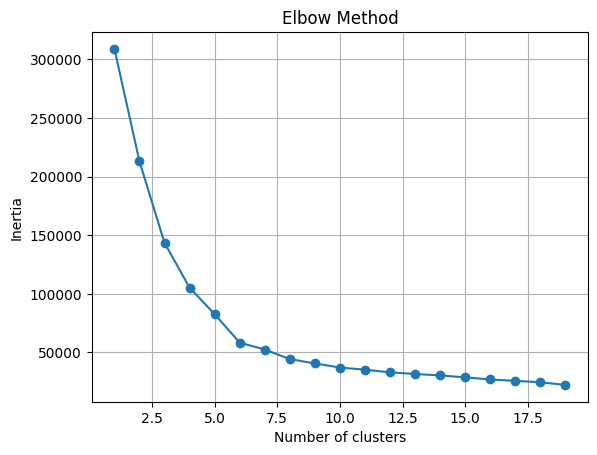

Silhouette score for k=2: 0.293
Silhouette score for k=3: 0.384
Silhouette score for k=4: 0.392
Silhouette score for k=5: 0.377
Silhouette score for k=6: 0.451
Silhouette score for k=7: 0.443
Silhouette score for k=8: 0.426
Silhouette score for k=9: 0.412

 Best k according to silhouette score: 6


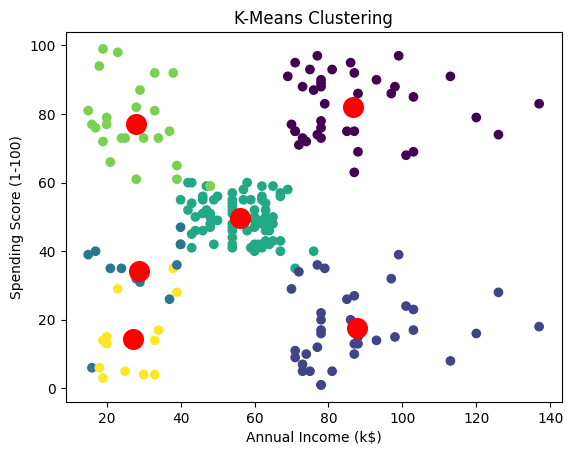

In [18]:
from sklearn.cluster import KMeans
inertia = [] #stores wcss scores
X=df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']]
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X) # after fitting we get to know that which point is in which cluster.
    score = silhouette_score(X, labels)
    print(f"Silhouette score for k={k}: {score:.3f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\n Best k according to silhouette score: {best_k}")

kmeans = KMeans(n_clusters=best_k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("K-Means Clustering")
plt.show()

In [ ]:
# Why Are Some Points Overlapping But in Different Clusters?
# You’re seeing 2D projections (like Annual Income vs Spending Score)
# But: Clustering is done in higher dimensions (in this case: 3D → Age, Income, Spending Score)
# So two points can look identical in 2D, but still be very different in the third dimension

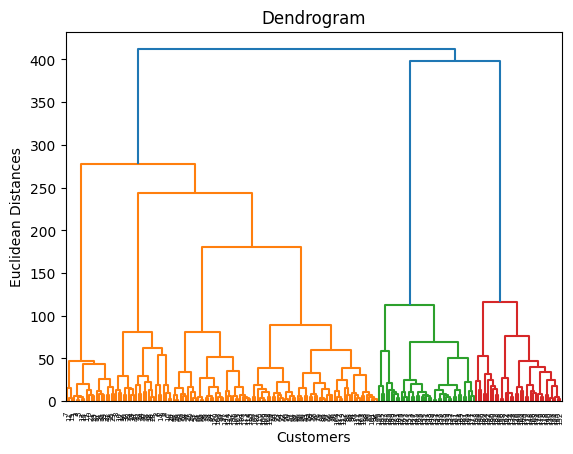

K=2, Silhouette Score=0.299
K=3, Silhouette Score=0.381
K=4, Silhouette Score=0.410
K=5, Silhouette Score=0.440
K=6, Silhouette Score=0.443
K=7, Silhouette Score=0.426
K=8, Silhouette Score=0.410
K=9, Silhouette Score=0.366

Best k according to silhouette score: 6


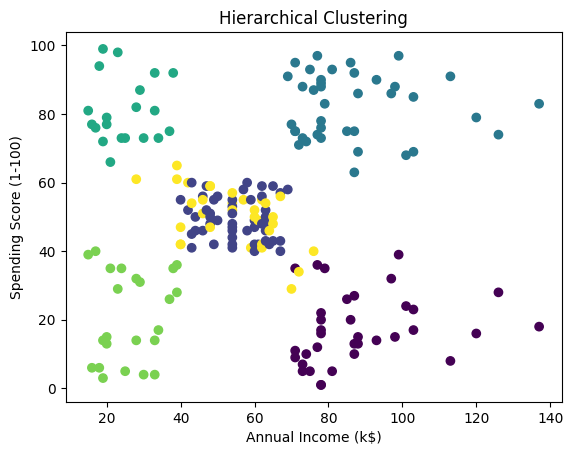

In [21]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

#silhouette score
best_score = -1
best_k = 0
for k in range(2, 10):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")
    if score > best_score:
        best_score = score
        best_k = k
print(f"\nBest k according to silhouette score: {best_k}")


# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=best_k)
y_hc = hc.fit_predict(X)

# Plot clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_hc, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Hierarchical Clustering")
plt.show()

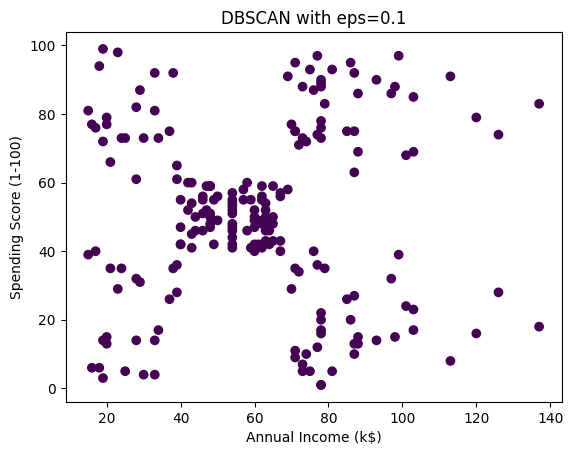

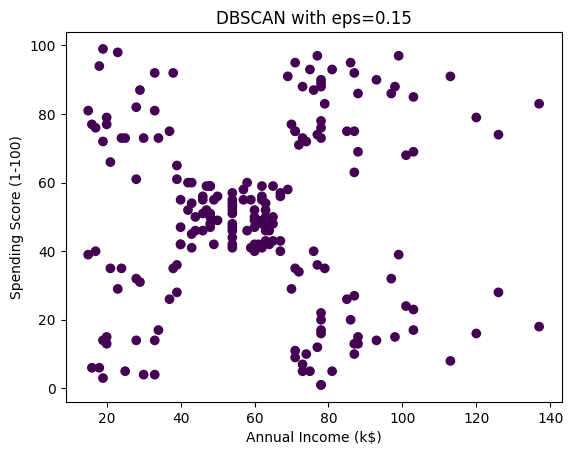

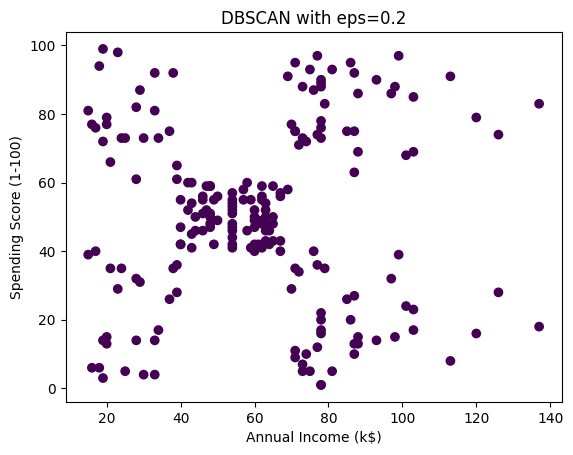

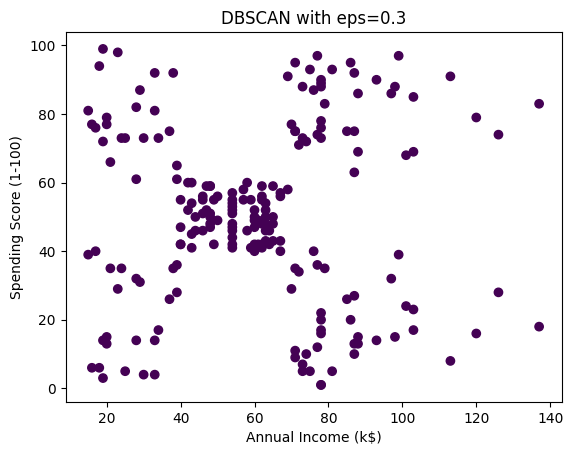

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
for eps_val in [0.1, 0.15, 0.2, 0.3]:
    db = DBSCAN(eps=eps_val, min_samples=5)
    y_db = db.fit_predict(X)
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_db, cmap='viridis')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f"DBSCAN with eps={eps_val}")
    plt.show()




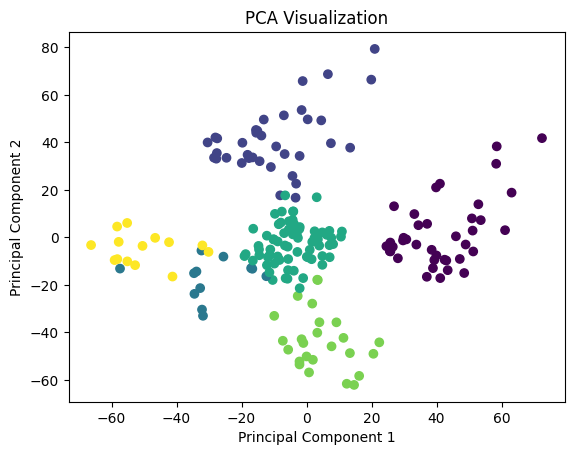

[[-31.8705078  -33.00142531]
 [  0.76339691 -56.84386532]
 [-57.40872557 -13.12293619]
 [ -2.16989648 -53.47790486]
 [-32.17491966 -30.387005  ]]


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

print(X_pca[:5])